#   Figures for Multi-Lateral Surgical Pattern Cutting With Deep Tensioning Policies

##### Authors: Brijen Thananjeyan, Animesh Garg, Sanjay Krishnan, Carolyn Chen, Ken Goldberg

In [158]:
# Environment setup

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys, pickle, os
import pandas as pd
from scipy import stats
from sympy import latex
from pandas import DataFrame
from registration import *
from shapecloth import *
from cloth import *
from pattern_designer import *

dir_figs = './figures/'
dir_pts  = './pt_files/'
dir_data = './sim_files/'

## Shapes

##### Visualize the 21 different shapes and curves for which we ran simulations on

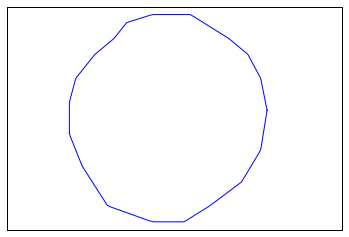

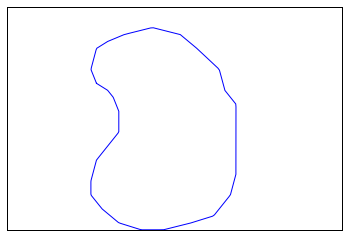

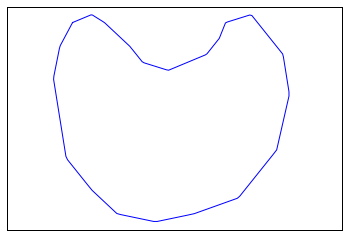

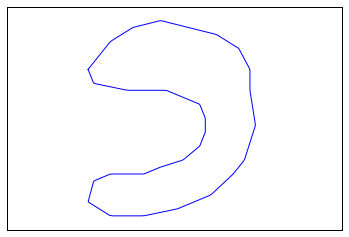

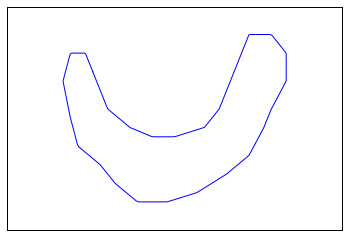

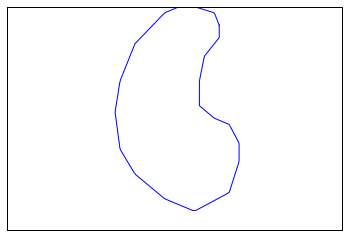

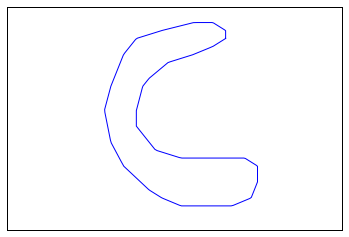

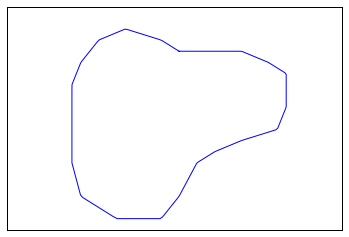

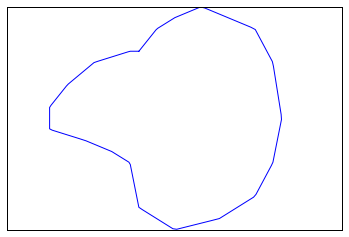

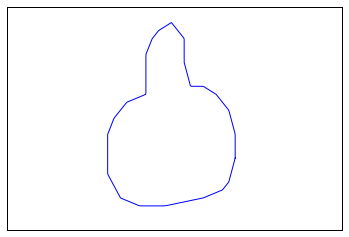

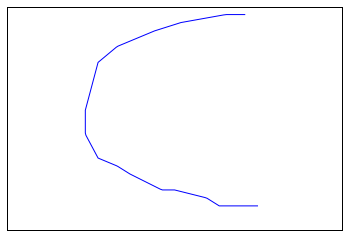

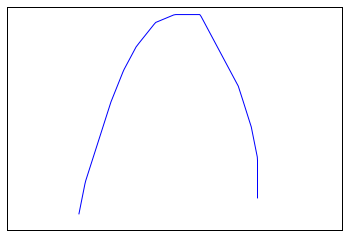

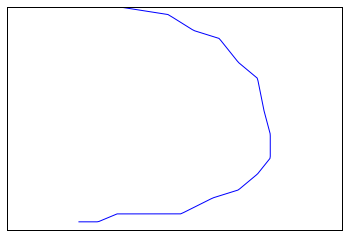

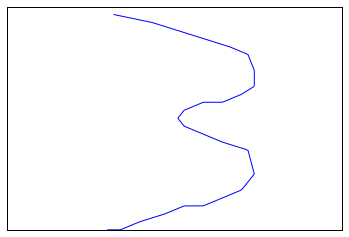

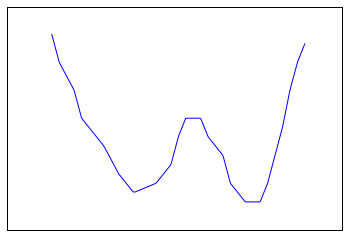

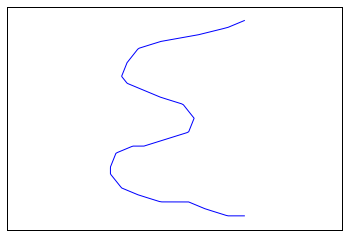

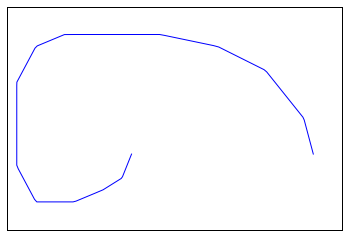

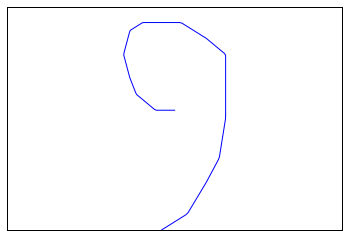

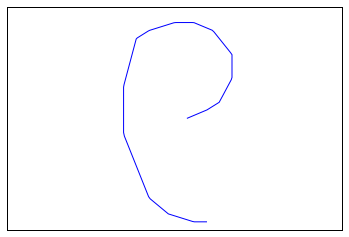

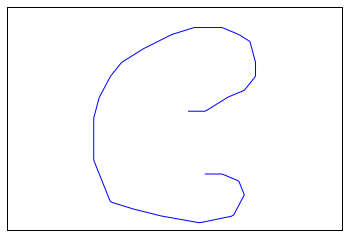

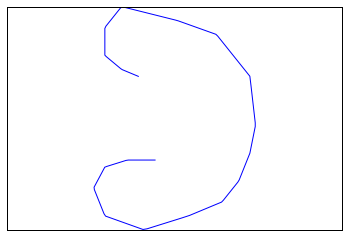

In [47]:
def vis_shape(corners, points, filename, savefig=True):
    trajectory = np.asarray(get_trajectory(corners, pts, True))
    plt.plot(trajectory[:,0], trajectory[:,1] , 'b-', alpha=1.0)
    plt.axis('equal')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    if savefig == True:
        plt.savefig(dir_figs+filename+'.svg', format='svg', facecolor='w', edgecolor='w')
    plt.show()

num_shapes = 21
pd = PatternDesigner()
for i in range(1, num_shapes+1):
    filename = 'pts_%d' %(i)
    pd.load_pts(filename)
    corners = pd.corners
    pts = pd.trajectory
    vis_shape(corners, pts, filename)

## Accuracy accuracy for no-hold, hold, and tension phases per shape

##### Percentage scores are calculated by calculating $\frac{(points cut)}{(total original points)}$
##### We report three average mean percentage scores for each of the 21 shapes: 1) open loop cutting, 2) cutting with passive grasping, and 3) cutting with active tensioning

In [184]:
num_shapes = 21
index = []
scores = [['' for x in range(3)] for y in range(21)] 

for i in range(1, num_shapes+1):
    filename = 'pts_%d' %(i)
    filepath = dir_data + filename
    # open loop
    d = pickle.load(open(filepath+"/noholds", "rb"))
    totalpts = d['totalpts'] + 0.0
    scores[i-1][0] = '%.3f $\pm$ %.3f' %(np.mean(d['scores'])/(totalpts), 2*stats.sem([x / (totalpts) for x in d['scores']]))
    # passive grasping
    d = pickle.load(open(filepath+"/holds", "rb"))
    scores[i-1][1] = '%.3f $\pm$ %.3f' %(np.mean(d['scores'])/(totalpts), 2*stats.sem([x / (totalpts) for x in d['scores']]))
    # active tensioning
    d = pickle.load(open(filepath+"/data%d.p" %(i), "rb"))
    scores[i-1][2] = '%.3f $\pm$ %.3f' %(np.mean(d)/(totalpts), 2*stats.sem([x / (totalpts) for x in d]))
    
    
    index.append(filename)
df = DataFrame(scores, index=index, columns=['No-hold', 'Passive', 'Active'])
df


,No-hold,Passive,Active
pts_1,0.611 $\pm$ 0.016,0.770 $\pm$ 0.011,0.798 $\pm$ 0.060
pts_2,0.602 $\pm$ 0.012,0.717 $\pm$ 0.012,0.527 $\pm$ 0.010
pts_3,0.605 $\pm$ 0.012,0.679 $\pm$ 0.011,0.445 $\pm$ 0.018
pts_4,0.555 $\pm$ 0.029,0.729 $\pm$ 0.006,0.594 $\pm$ 0.032
pts_5,0.540 $\pm$ 0.000,0.604 $\pm$ 0.027,0.520 $\pm$ 0.017
pts_6,0.728 $\pm$ 0.050,0.722 $\pm$ 0.024,0.393 $\pm$ 0.019
pts_7,0.473 $\pm$ 0.021,0.580 $\pm$ 0.021,0.339 $\pm$ 0.023
pts_8,0.557 $\pm$ 0.010,0.703 $\pm$ 0.007,0.637 $\pm$ 0.035
pts_9,0.571 $\pm$ 0.000,0.714 $\pm$ 0.000,0.383 $\pm$ 0.005
pts_10,0.613 $\pm$ 0.000,0.790 $\pm$ 0.020,0.806 $\pm$ 0.041


In [185]:
print df.to_latex(escape=False)

\begin{tabular}{llll}
\toprule
{} &            No-hold &            Passive &             Active \\
\midrule
pts_1  &  0.611 $\pm$ 0.016 &  0.770 $\pm$ 0.011 &  0.798 $\pm$ 0.060 \\
pts_2  &  0.602 $\pm$ 0.012 &  0.717 $\pm$ 0.012 &  0.527 $\pm$ 0.010 \\
pts_3  &  0.605 $\pm$ 0.012 &  0.679 $\pm$ 0.011 &  0.445 $\pm$ 0.018 \\
pts_4  &  0.555 $\pm$ 0.029 &  0.729 $\pm$ 0.006 &  0.594 $\pm$ 0.032 \\
pts_5  &  0.540 $\pm$ 0.000 &  0.604 $\pm$ 0.027 &  0.520 $\pm$ 0.017 \\
pts_6  &  0.728 $\pm$ 0.050 &  0.722 $\pm$ 0.024 &  0.393 $\pm$ 0.019 \\
pts_7  &  0.473 $\pm$ 0.021 &  0.580 $\pm$ 0.021 &  0.339 $\pm$ 0.023 \\
pts_8  &  0.557 $\pm$ 0.010 &  0.703 $\pm$ 0.007 &  0.637 $\pm$ 0.035 \\
pts_9  &  0.571 $\pm$ 0.000 &  0.714 $\pm$ 0.000 &  0.383 $\pm$ 0.005 \\
pts_10 &  0.613 $\pm$ 0.000 &  0.790 $\pm$ 0.020 &  0.806 $\pm$ 0.041 \\
pts_11 &  0.530 $\pm$ 0.010 &  0.664 $\pm$ 0.014 &  1.052 $\pm$ 0.033 \\
pts_12 &  0.750 $\pm$ 0.000 &  0.750 $\pm$ 0.000 &  0.772 $\pm$ 0.016 \\
pts_13 &  0.497

## Average accuracy for no-hold, hold, and tension phases across all shapes

##### Percentage scores are calculated by calculating $\frac{(points cut)}{(total original points)}$
##### We report three average mean percentage scores across all 21 shape: 1) open loop cutting, 2) cutting with passive grasping, and 3) cutting with active tensioning

## Gravity Experiment

##### Varying gravity and visualizing the score for 1) open loop cutting, 2) cutting with passive grasping, 3a) cutting with active tensioning (policy 1), and 3b) cutting with active tensioning (policy 2)

# Resolution Experiment

##### The effect of varying cloth resolution $\{25, 100, 400, 625, 2500 \} $ points on policies tested on cloths with resolution $\{625, 2500\}$  points

# Noise Experiment

##### The effect of noise for 1) open loop cutting, 2) cutting with passive grasping, 3a) cutting with active tensioning (policy 1), and 3b) cutting with active tensioning (policy 2)

## Difference in error pre and post ordering

##### Visualize difference in error before and after brute force search for a good ordering for 1) open loop cutting, 2) cutting with passive grasping, and 3) cutting with active tensioning